# Regression

In this notebook, I'll demonstrate workflows for performing linear regression. For this purpose, I'll be using the 'Concrete' dataset from the UCI repository

In [65]:
# Load libraries

# General DS Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Pre-processing and Scoring
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, train_test_split

# Set up to use Latex
matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# Part 1: Loading and Inspecting Data

Here's the load for the "Concrete" dataset and a quick look at it

In [66]:
concrete = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls")
print(concrete.info())
print(concrete.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                

Clearly, a bit of clean-up is useful here. I'll just change the names of each column so they're less onerous. 

In [67]:
# Shorten column names directly
concrete.columns = ['Cement', 'Blast_Slag', 'Fly_Ash', 
                    'Water', 'Superplasticizer', 'Coarse_Aggregate',
                    'Fine_Aggregate', 'Age', 'Compressive_Strength']
print(concrete.head())

   Cement  Blast_Slag  Fly_Ash  Water  Superplasticizer  Coarse_Aggregate  \
0   540.0         0.0      0.0  162.0               2.5            1040.0   
1   540.0         0.0      0.0  162.0               2.5            1055.0   
2   332.5       142.5      0.0  228.0               0.0             932.0   
3   332.5       142.5      0.0  228.0               0.0             932.0   
4   198.6       132.4      0.0  192.0               0.0             978.4   

   Fine_Aggregate  Age  Compressive_Strength  
0           676.0   28             79.986111  
1           676.0   28             61.887366  
2           594.0  270             40.269535  
3           594.0  365             41.052780  
4           825.5  360             44.296075  


So I'll be trying to predict compressive strength given the other components, all of which are numerical types. 

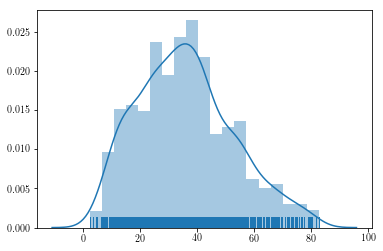

In [68]:
# Plot a histogram
sns.distplot(concrete.Compressive_Strength.values, rug = True)
plt.show()

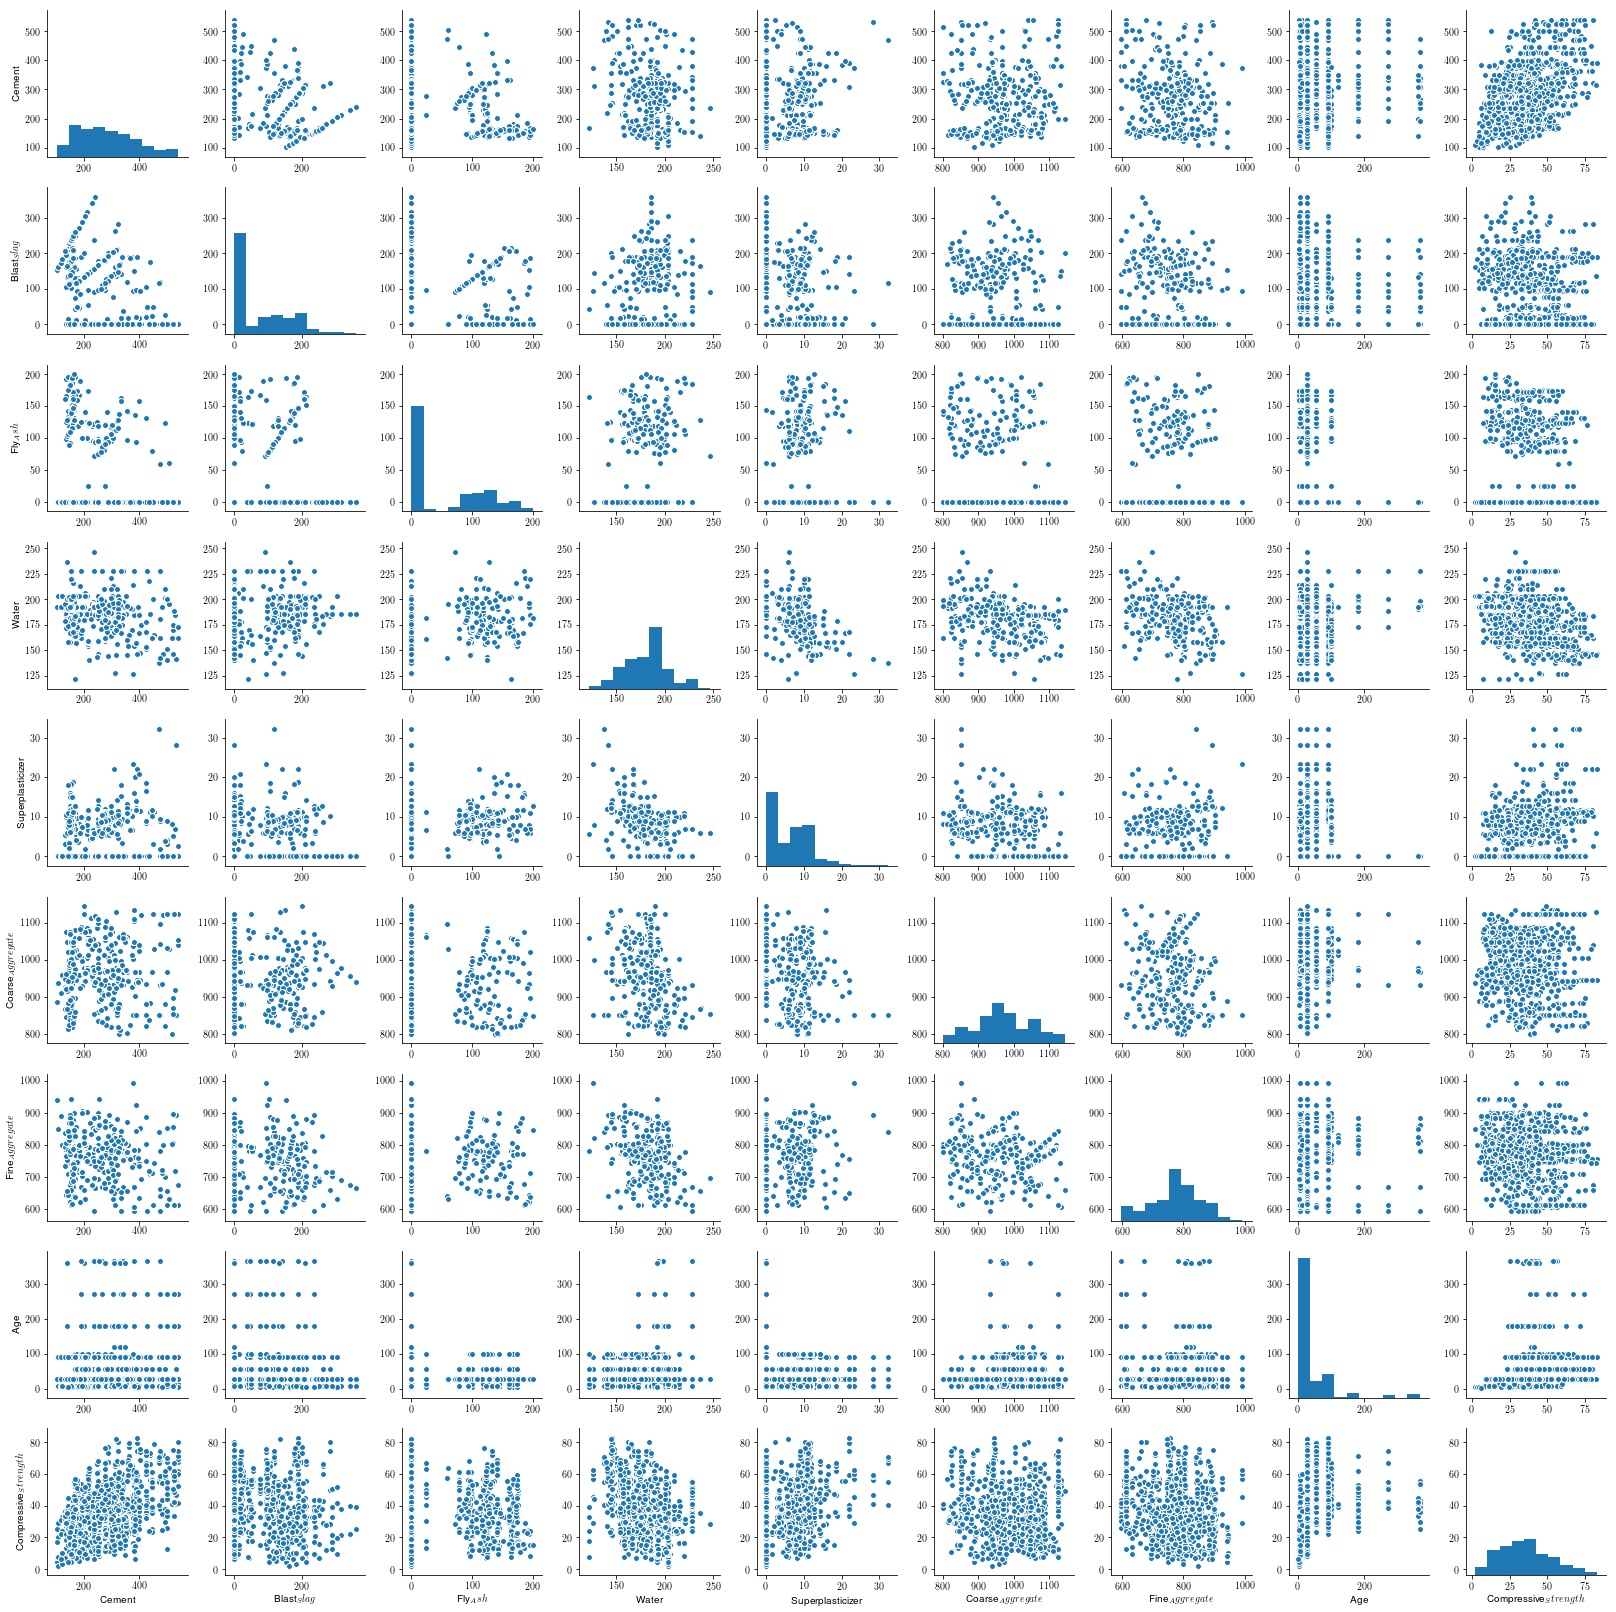

In [69]:
# Plot all values
sns.pairplot(concrete)
plt.show()

# Part 2: Simple Regression

Now I'm going to do some simple regression, using each model individually. For this, I'll divide up features into X and Y, then train/test split them.

In [7]:
# Split features and outccome
X = concrete.drop(['Compressive_Strength'], axis = 1).values
Y = concrete.Compressive_Strength.values

# Split to train/test (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

### 2.1: Linear Regression

Here's a simple linear regression, including the R^2 score:

In [8]:
# Create a model instance
lr = LinearRegression()

# Train model on data
lr.fit(X_train, Y_train)

# Score on test data (R^2)
lr.score(X_test, Y_test)

0.56882212963823986

It's probably more instructive to see this in plot form....here's a function to plot and predict with a model:

In [9]:
def predictAndPlot(model, X_test, Y_test, plot_flag = True):
    
    '''Given a fit regression model and test data, predict and plot in comparison to actual'''
    
    # Take in the fit model
    Y_pred = model.predict(X_test)
    
    # If plot flag, then plot it
    if plot_flag:
        
        # Create a dataframe of predicted and actual
        plot_data = pd.DataFrame({'Actual' : Y_test,
                                  'Predicted' : Y_pred})
    
        # Plot using Seaborn
        sns.lmplot(data = plot_data, 
                   x = 'Actual',
                   y = 'Predicted',
                   fit_reg= False)
    
        # Also plot the 45 Line
        plt.plot([0, 80], [0, 80], color = 'red')    
        
        # Add text with score
        r_2 = model.score(X_test, Y_test)
        plt.text( x = 0, y = 80, s = "R^2 = {:0.1f}".format(r_2),
                 fontsize = 16)
        plt.show()
    
    return Y_pred

Now I'll try out the function

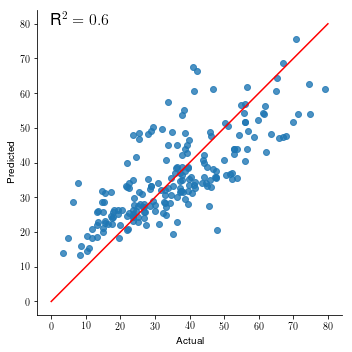

In [10]:
Y_pred_lr = predictAndPlot(lr, X_test, Y_test)

A word on this function: it seems to only work (the Latex part that is) every other time. Not certain why, but it's annoying

## 2.2: Random Forest Regression

I'll do the same exact thing, but use a random forest regressor:

In [11]:
# Create a model instance
rf = RandomForestRegressor()

# Train model on data
rf.fit(X_train, Y_train)

# Score on test data (R^2)
rf.score(X_test, Y_test)

0.88768792869226687

Note that the score is MUCH higher, which isn't necessarily surprising. Now for the prediction plot:

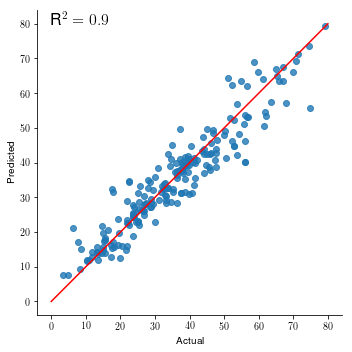

In [12]:
Y_pred_rf = predictAndPlot(rf, X_test, Y_test)

Much better looking; now for the final single model:

## 2.3 Gradient Boosted Regression

Same as before, but different model:

In [13]:
# Create a model instance
gb = GradientBoostingRegressor()

# Train model on data
gb.fit(X_train, Y_train)

# Score on test data (R^2)
gb.score(X_test, Y_test)

0.893425296242777

Best score yet, which is kind of what I was expecting. Final prediction plot:

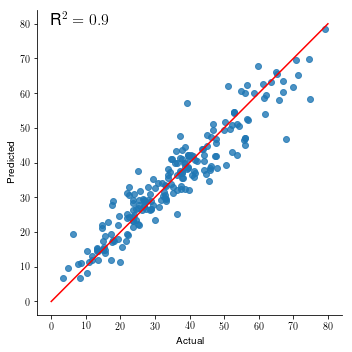

In [14]:
Y_pred_gb = predictAndPlot(gb, X_test, Y_test)

# Part 3: Cross Validation

Above, I did a random split for training/test. It's probably a good idea for me to instead compare models via their cross-validation scores. For that, I've got the following function:

In [57]:
# Function for one model
def doCV(model, X, Y): 
        
    # Create models
    cv_scores = cross_val_score(model, X, Y, cv = 5,
                                 scoring = 'r2')
      
    # Return R^2 average
    return np.mean(cv_scores), cv_scores

*Important note: other metrics for regression scoring are [here](http://scikit-learn.org/stable/modules/model_evaluation.html)*

This function will be used to get the mean CV score for each method; I'll do it in list comprehension form:

In [58]:
model_list = zip([lr, rf, gb], ['Linear Regression', 'Random Forest', 'Gradient Boosting'])

dummy_var = [print("{} Score: {:0.2f}".format(name, doCV(model, X, Y)[0])) for model, name in model_list]

Linear Regression Score: 0.46
Random Forest Score: 0.30
Gradient Boosting Score: 0.46


In [59]:
_, all_scores = doCV(rf, X, Y)
print(all_scores)

[ 0.60112846  0.72183814  0.73912612  0.83783189 -1.05860714]


This is weird; I think these indicate that some of the features are skewed and I should correct via a scaling or something...I'll do this tomorrow!

# Part 4: Evaluating the Models

I want to be able to examine the features; here's how to do that for different models

In [ ]:
## Something for coefficients or feature importances